

Build **kNN** and **logistic regression** classifiers using sklearn library to predict "passed" (label variable) by using given data. 
- Start the project with data processing such as converting non-numeric values to numerical ones,  data normalization, etc.
- Explore and analyze the data using feature visualization such as correlation heatmap, and distribution plots by commenting on your findings. Choose min. 3 features for the visualization step. 
- Then, shuffle and split your data into train and test sets randomly, with a ratio of 70:30. (Write your own shuffling and spliting code, do not use predefined function train_test_split).
- Build your models (with proper comments and explanations) using the training set.
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance.
- Plot confusion matrices for your models over the test set, and comment on the outcomes. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate/comment the prediction performance of each classifier. 

Notes:

* Choose the optimal k value using Minkowski distance (by trying two different p-values) for the kNN model.


* **Don't forget to add comments to your code lines to explain how your program works, and your intentions behind it. Also, do not forget to comment on the outcomes and comparisons.** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading csv data
df = pd.read_csv("data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
# Checking for null values
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [4]:
# Checking if there is any inconsistency
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [5]:
# Removing outliers by age feature
df = df[df['age'] <= 20]

In [6]:
# Converting non-numeric binary variables to numeric binary variables
convert = {'GP':0, 'MS':1, 'F':0, 'M':1, 'U':0, 'R':1, 'LE3':0, 'GT3':1, 'T':0, 'A':1, 'no':0, 'yes':1}

df = df[df.columns].replace(convert)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,0,1,1,4,4,at_home,teacher,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,0,1,0,1,1,at_home,other,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,0,0,0,1,1,at_home,other,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,0,1,0,4,2,health,services,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,0,1,0,3,3,other,other,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1,0,18,0,1,0,1,1,other,other,...,0,0,1,1,1,1,1,5,0,0
390,1,1,20,0,0,1,2,2,services,services,...,0,0,5,5,4,4,5,4,11,0
391,1,1,17,0,0,0,3,1,services,services,...,1,0,2,4,5,3,4,2,3,1
393,1,1,18,1,0,0,3,2,services,other,...,1,0,4,4,1,3,4,5,0,1


In [7]:
# Creating dummy variables to convert categorical variables to numeric
df = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'reason', 'guardian', ], drop_first=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,0,0,0,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,0,1,0,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1,0,18,0,1,0,1,1,2,2,...,0,0,1,0,0,0,0,0,1,0
390,1,1,20,0,0,1,2,2,1,2,...,0,0,0,1,0,0,0,0,0,1
391,1,1,17,0,0,0,3,1,2,1,...,0,0,0,1,0,0,0,0,1,0
393,1,1,18,1,0,0,3,2,3,1,...,0,0,1,0,0,0,0,0,1,0


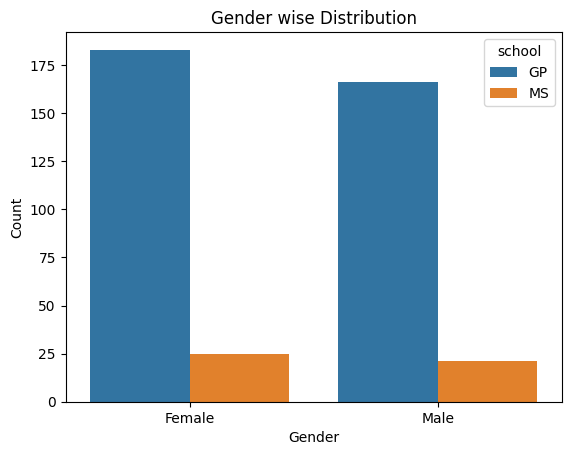

In [8]:
ax = plt.subplot()
ax = sns.countplot(data=pd.read_csv("data.csv"), x="sex", hue="school")
ax.set_xticklabels(["Female", "Male"])
ax.set_title("Gender wise Distribution")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.show()

We can see that there are much more students from school 'GP' than 'MS'. We also see that there are slightly more female students.

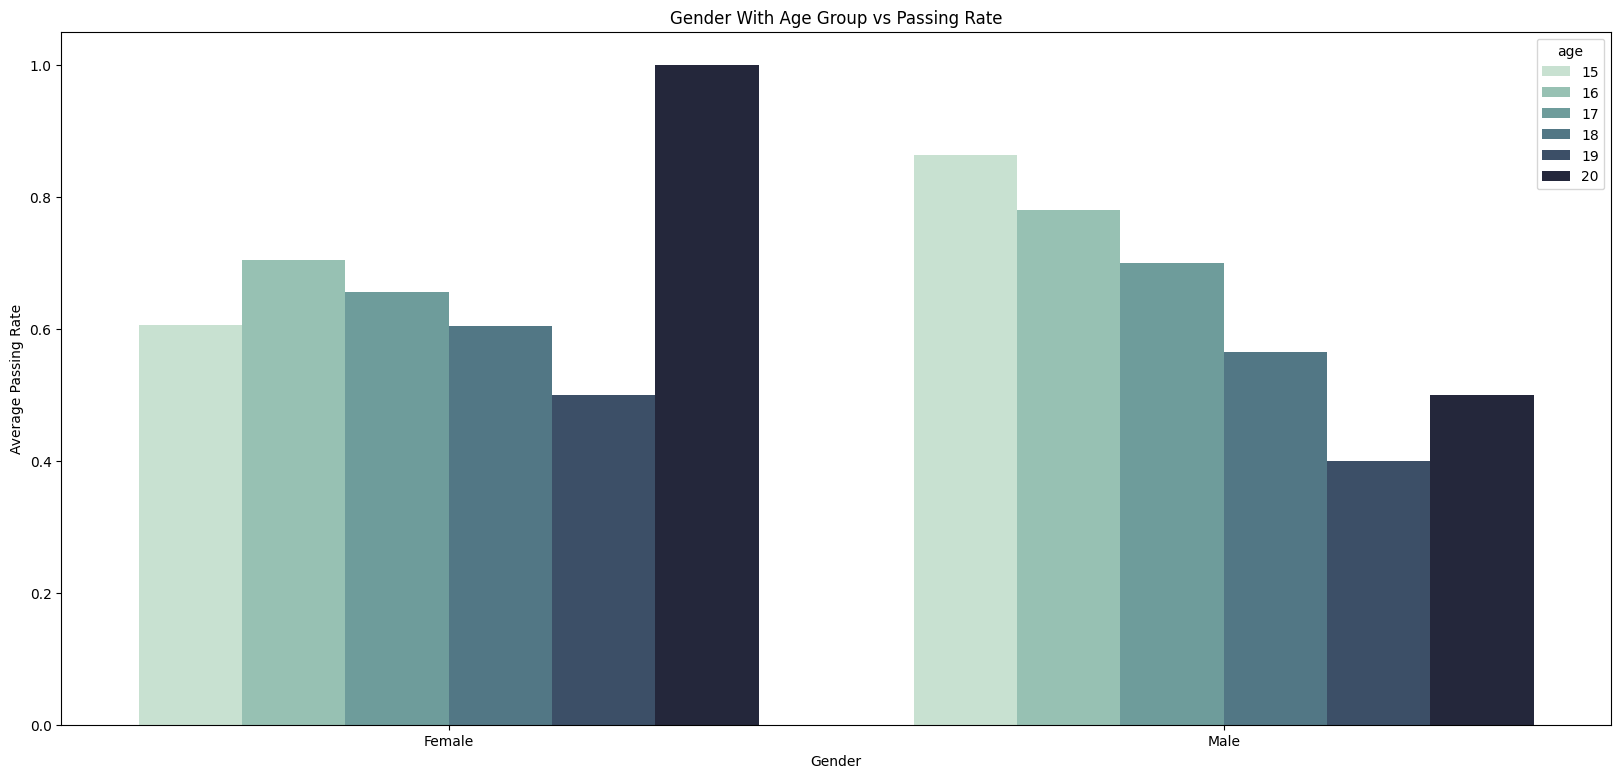

In [9]:
plt.rcParams["figure.figsize"] = [20, 9]
palette=sns.cubehelix_palette(start=.10, rot=-.4)
ax = plt.subplot()
ax = sns.barplot(data=df, x='sex', y='passed', hue="age", errorbar=None, palette=palette)
ax.set_xticklabels(["Female", "Male"])
ax.set_title("Gender With Age Group vs Passing Rate")
ax.set_xlabel("Gender")
ax.set_ylabel("Average Passing Rate")
plt.show()

From this figure we see that the most successful ones are the feamale students at age 20. For the rest of female students the succsess rate is about the same level. However for male students the most successful ones are at age 15. Here we can clearly see a decreasing success trend with increasing age. So, we can say as age increases, success decreases for male students.

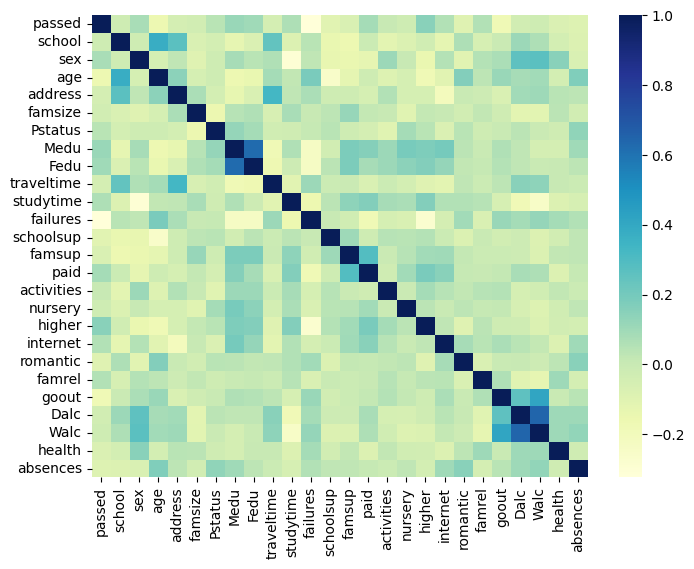

In [10]:
plt.rcParams["figure.figsize"] = [8, 6]
temp = df[["passed", "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "traveltime", "studytime",
           "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic",
           "famrel", "goout", "Dalc", "Walc", "health", "absences"]]
sns.heatmap(temp.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

For passing the test we can see a higher correlation between these features: sex, Medu, Fedu, studytime, paid, higher, internet and famrel

In [11]:
# Shuffling the data
dataLength = len(df)
df = df.iloc[np.random.permutation(dataLength)]

# Splitting the data into training and testing set with a ratio of 70:30 
trainingSet = df.iloc[ :int(dataLength*0.7), : ]
testingSet = df.iloc[int(dataLength*0.7): , : ]

Y_train = trainingSet["passed"]
X_train = trainingSet.drop(columns=["passed"])

Y_test = testingSet["passed"]
X_test = testingSet.drop(columns=["passed"])

In [12]:
# Defining minkowski distance for p=1
def p1_minkowski(X, Y):
    total = 0
    for i in range(len(X)):
        total += np.abs(X[i]-Y[i])
    
    return total

# Defining minkowski distance for p=2
def p2_minkowski(X, Y):
    total = 0
    for i in range(len(X)):
        total += (X[i]-Y[i])**2
    
    return total**(1/2)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

error_p1 = []
error_p2 = []

# Calculating minkowski distance with p=1 for each odd value between 1 to 50. Since it is a classification problem I am 
# only taking odd values for k value.
for k in range(1, 51, 2):
    knn_cls = KNeighborsClassifier(n_neighbors=k)
    knn_cls.fit(X_train, Y_train)
    Y_predict = knn_cls.predict(X_test)
    err = p1_minkowski(np.array(Y_test), Y_predict)
    error_p1.append(err)

# Calculating minkowski distance with p=2 for each odd value between 1 to 50. Since it is a classification problem I am 
# only taking odd values for k value.
for k in range(1, 51, 2):
    knn_cls = KNeighborsClassifier(n_neighbors=k)
    knn_cls.fit(X_train, Y_train)
    Y_predict = knn_cls.predict(X_test)
    err = p2_minkowski(np.array(Y_test), Y_predict)
    error_p2.append(err)

print(error_p1)

[43, 43, 37, 38, 39, 39, 41, 40, 38, 38, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38]


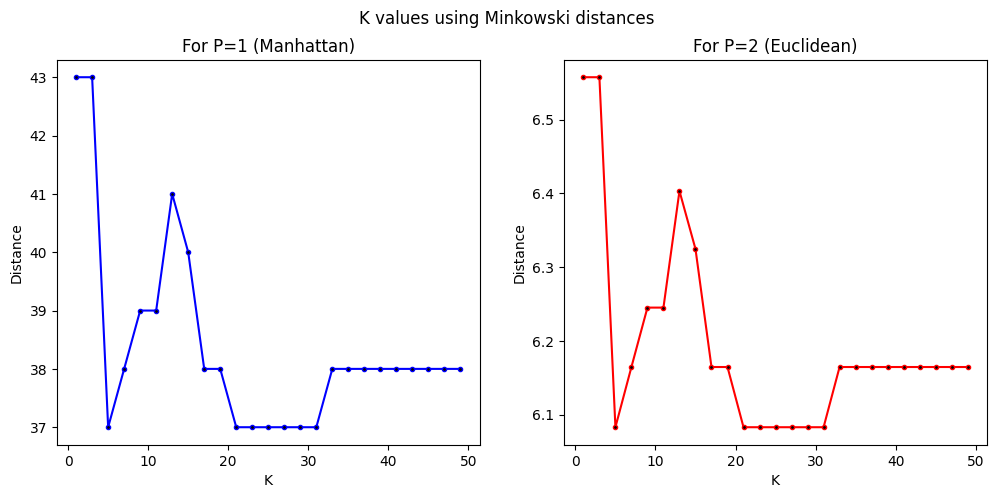

In [14]:
# Plotting distances for each k value to find the best k value for the kNN model.
plt.rcParams["figure.figsize"] = [12, 5]
fig , (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("K values using Minkowski distances")

ax1.plot(range(1, 51, 2), error_p1, color='b', marker='.', markerfacecolor='#000000')
ax1.set_title("For P=1 (Manhattan)")
ax1.set_xlabel("K")
ax1.set_ylabel("Distance")

ax2.plot(range(1, 51, 2), error_p2, color='r', marker='.', markerfacecolor='#000000')
ax2.set_title("For P=2 (Euclidean)")
ax2.set_xlabel("K")
ax2.set_ylabel("Distance")

plt.show()

Since both minkowski distances calculate the distance between two values, the graphs look very similar. From these graphs we can choose the best k value for the kNN model. 

In [15]:
from sklearn.model_selection import cross_val_score

# Building kNN and logistic regression models
knn_reg = KNeighborsClassifier(n_neighbors= 2*error_p1.index(min(error_p1)) + 1)
log_reg = LogisticRegression(solver='liblinear')

# Calculating the performance of the models by using 10-Fold Cross Validation
knn_scores = cross_val_score(knn_reg, X_train, Y_train, cv=10)
log_scores = cross_val_score(log_reg, X_train, Y_train, cv=10)

scores = {"kNN":knn_scores, "logistic regression":log_scores}
score_table = pd.DataFrame.from_dict(scores).T
score_table['mean'] = score_table.mean(axis=1)
score_table

,0,1,2,3,4,5,6,7,8,9,mean
kNN,0.714286,0.714286,0.642857,0.607143,0.714286,0.555556,0.703704,0.592593,0.703704,0.740741,0.668915
logistic regression,0.750000,0.714286,0.571429,0.678571,0.750000,0.592593,0.666667,0.703704,0.666667,0.777778,0.687169


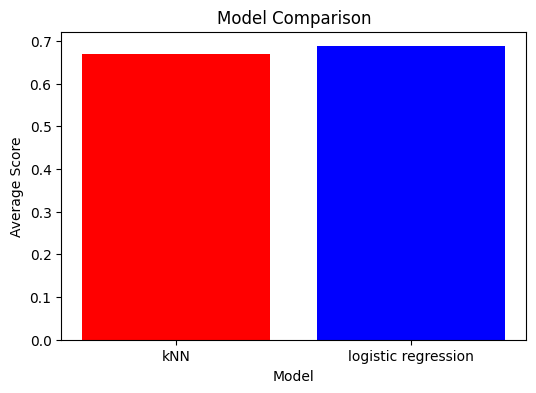

In [16]:
plt.rcParams["figure.figsize"] = [6, 4]
fig, ax = plt.subplots()
ax.bar(["kNN", "logistic regression"], [knn_scores.mean(), log_scores.mean()], color=["red", "blue"])
ax.set_title("Model Comparison")
ax.set_xlabel("Model")
ax.set_ylabel("Average Score")
plt.show()

From the table and from the graph we can see that kNN scores slightly better than logistic regression

In [17]:
# Fitting the models by using trainin data
knn_reg.fit(X_train, Y_train)
log_reg.fit(X_train, Y_train)

# Making predictions with the models by using test data
knn_pred = knn_reg.predict(X_test)
log_pred = log_reg.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrices
knn_matrix = confusion_matrix(knn_pred, Y_test)
log_matrix = confusion_matrix(log_pred, Y_test)

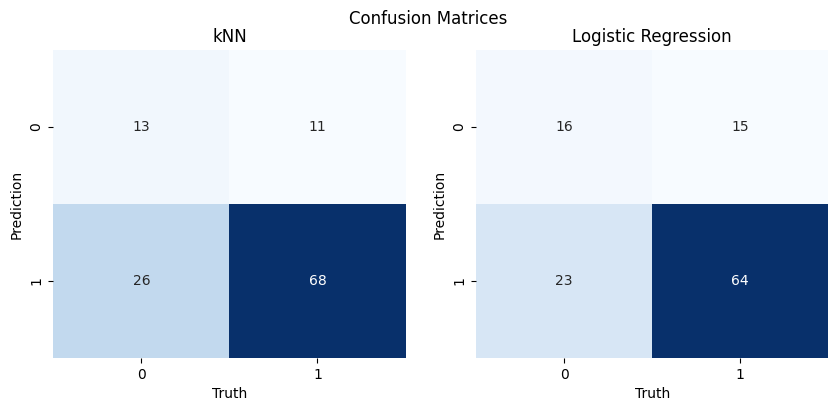

In [19]:
# Plotting confusion matrices
plt.rcParams["figure.figsize"] = [10, 4]
fig , (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Confusion Matrices")

sns.heatmap(knn_matrix, cmap="Blues", annot=True, cbar=False, ax=ax1)
ax1.set_title("kNN")
ax1.set_xlabel("Truth")
ax1.set_ylabel("Prediction")

sns.heatmap(log_matrix, cmap="Blues", annot=True, cbar=False, ax=ax2)
ax2.set_title("Logistic Regression")
ax2.set_xlabel("Truth")
ax2.set_ylabel("Prediction")

plt.show()

By using these Matrices we can calculate Accuracy, Error Rate, Presicion and Recall for both models.

We can see that both models produce too much false positive (FP) results.

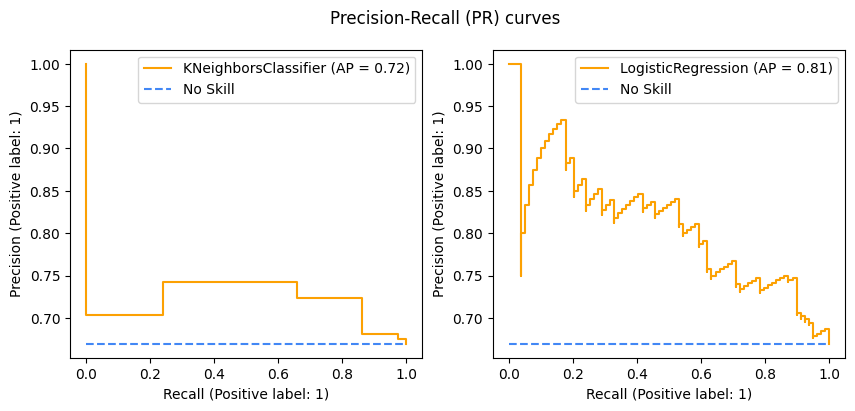

In [20]:
from sklearn.metrics import PrecisionRecallDisplay

#Plotting Precision-Recall curves both for kNN Classifier and LogisticRegression
fig , (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Precision-Recall (PR) curves")
no_skill = len(Y_test[Y_test==1]) / len(Y_test)

PrecisionRecallDisplay.from_estimator(knn_reg, X_test, Y_test, ax=ax1)
ax1.get_lines()[0].set_color("#fca103")
ax1.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax1.get_lines()[1].set_color("#4287f5")
ax1.legend()

PrecisionRecallDisplay.from_estimator(log_reg, X_test, Y_test, ax=ax2)
ax2.get_lines()[0].set_color("#fca103")
ax2.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax2.get_lines()[1].set_color("#4287f5")
ax2.legend()

plt.show()

From these graphs we can see that both figures are above average. Since our models produce too much false positive results we can reduce this by changing the treshold for both models. So we can get better results.